Here i am importing the libraries which are used for kpca



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.manifold import TSNE

Here i am reading the csv file and checking whether there are null data or not

In [3]:
data = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/DataKPCA.csv")
data.isnull().sum()

x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
dtype: int64

Here i am preprocessing the data

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(data)
data_std = sc.transform(data)

## here i am implementing the kernel pca and calculating the variance and then cummulative sum of the variance and plotted.

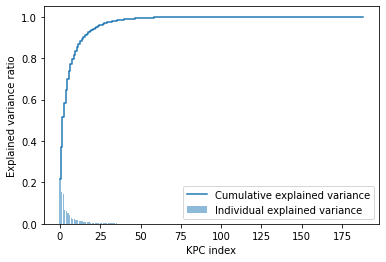

In [17]:
from sklearn.decomposition import KernelPCA
kp = KernelPCA( kernel="rbf")
kp.fit(data_std)
eigen_sum = sum(kp.eigenvalues_)
eigen_val = kp.eigenvalues_

variance = eigen_val / eigen_sum
cum_sum_exp = np.cumsum(variance)
plt.bar(range(0,len(variance)), variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('KPC index')
plt.legend()
plt.show()

References:

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html

For Explained variance plot:
1. https://vitalflux.com/pca-explained-variance-concept-python-example/#:~:text=Explained%20variance%20is%20calculated%20as,decomposition%20PCA%20class